## Analysis of Stochastic Processes ($\S$ 10.5)

If a system is always variable, but the variability is not (infinitely) predictable, then we have a [**stochastic**](https://en.wikipedia.org/wiki/Stochastic) process.  Counter to what you may think, these processes can also be characterized.

Take a (stochastically varying) quasar which has both *line* and *continuum* emission and where the line emission is stimulated by the continuum.

Since there is a physical separation between the regions that produce each type of emission, we get a delay between the light curves as can be seen here:

![Peterson 2001, RM](https://ned.ipac.caltech.edu/level5/Sept01/Peterson2/Figures/figure24.jpg)

## Correlation function

To understand stochastic processes, let's first talk about [correlation functions](https://en.wikipedia.org/wiki/Correlation_function).  A correlation function ($\S$ 6.5) **gives us information about the time delay between two processes**.

The correlation function between $f(t)$, and $g(t)$ is defined as
$${\rm CF}(\Delta t) = \frac{\lim_{T\rightarrow \infty}\frac{1}{T}\int_T f(t)g(t+\Delta t)dt }{\sigma_f \sigma_g}$$

If one time series is derived from another simply by shifting the time axis by $t_{\rm lag}$, then their correlation function will have a peak at $\Delta t = t_{\rm lag}$.

Computing the correlation function is basically the mathematical processes of sliding the two curves over each other and computing the degree of similarity for each step in time.  The peak of the correlation function reveals the time delay between the processes.  Below we have the correlation function of the line and continuum emission from a quasar, which reveals a $\sim$ 15 day delay between the two.

![Peterson 2001, RM](https://ned.ipac.caltech.edu/level5/Sept01/Peterson2/Figures/figure25.jpg)

Note: this is the temporal correlation function, but more generally the we can compute the CF over any parameter of interest (typically it's space or time).

Here's an example of angular galaxy correlation function:
![Connolly '02](figures/angular-cf-Connolly02.jpg)
(from Connolly et al., 2002, *The Angular Correlation Function of Galaxies from Early Sloan Digital Sky Survey Data*).

## Auto-correlation Function

In an **autocorrelation function (ACF)**, $f(t)= g(t) \equiv y(t)$ and we instead are revealing information about variability timescales present in a process.

$${\rm ACF}(\Delta t) = \frac{\lim_{T\rightarrow \infty}\frac{1}{T}\int_T y(t)y(t+\Delta t)dt }{\sigma_y^2}$$

## What can the ACF tell us?

If the values of $y$ are uncorrelated, then ACF$(\Delta t)=0$ (except for ACF$(0)=1$).

For processes that "retain memory" of previous states only for some characteristic time $\tau$, the ACF will vanish for $\Delta t \gg \tau$.

Turning that around, the predictability of future behavior of future behavior of such a process is limited to times up to $\sim \tau$; you have to "let the process run" to know how it will behave at times longer than that.

## Power Spectral Density

The Fourier Transform of an ACF is the [Power Spectral Density (PSD)](https://en.wikipedia.org/wiki/Spectral_density).  So, the PSD is an analysis in frequency space and the ACF is in time space.

For example, for a sinusoidal function in time space, the ACF will have the same period, $T$. Conversly, the PSD in frequency space will be a $\delta$ function centered on $\omega = 1/2\pi T$.

## The Structure Function

The *structure function* is another quantity that is frequently used in astronomy and is related to the ACF:

$${\rm SF}(\Delta t) = {\rm SF}_\infty[1 - {\rm ACF}(\Delta t)]^{1/2},$$

where ${\rm SF}_\infty$ is the standard deviation of the time series as evaluated on timescales much larger than any charateristic timescale.

### Why Structure Function?

The structure function is interesting because it's equal to the standard deviation of the distribution of the differences of $y(t_2) - y(t_1)$ evaluated at many different $t_1$ and $t_2$ (i.e., with a time lag of $\Delta t = t_2 - t_1$), and divided by $\sqrt 2$.

This is of practical use: if I have a series of observations $y_i$ (taken at random times $t_i$) it's relatively straighforward to compute the structure function.

### Connection to the PSD

If we find that ${\rm SF} \propto t^{\alpha}$, then one can show that the ${\rm PSD} \propto \frac{1}{f^{1+2\alpha}}$.

So by estimating the SF, we can learn something about the PSD of the physical (stochastic) process that's generating the variability.

## Examples of Stochastic Processes

So an analysis of a stochastic system can be done with either the ACF, SF, or PSD.

AstroML has [time series](http://www.astroml.org/modules/classes.html#module-astroML.time_series) and [Fourier](http://www.astroml.org/modules/classes.html#module-astroML.fourier) tools for generating light curves drawn from a power law in frequency space.  Note that these tools define $\beta = 1+2\alpha$.

Let's play with the code below to make a plot of counts vs. time and of the PSD vs. frequency for both a $1/f$ and a $1/f^2$ process.  (Where the latter is known as Brownian motion or a **random walk**.)

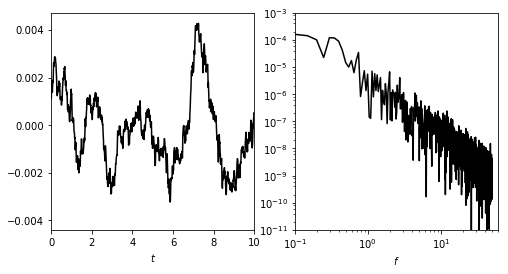

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import generate_power_law
from astroML.fourier import PSD_continuous

N = 2014
dt = 0.01
beta = 2 ## Change this from 1 to 2 (or higher, or lower)

t = dt * np.arange(N)
y = generate_power_law(N, dt, beta) ## Complete
f, PSD = PSD_continuous(t, y) ## Complete
    
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax1.plot(t, y, '-k')
ax1.set_xlim(0, 10)
ax1.set_xlabel(r'$t$')

ax2 = fig.add_subplot(122, xscale='log', yscale='log')
ax2.plot(f, PSD, '-k')   
ax2.set_xlim(1E-1, 60)
ax2.set_ylim(1E-11, 1E-3)
ax2.set_xlabel(r'$f$')

plt.show()

![Time series and PSD](figures/timeseries-and-psd.png)

A few things to notice:
* The overall power (the amplitude) of the signal is determined by the power at low frequencies in the PSD. We've set those to the same value, so the overall amplitude of the signal should be similar.
* You should find that, because the power at high frequency is larger for $1/f$, that light curve will look noisier.
* The structure function for the $1/f$ process is constant, and it will be proportional to $\sqrt \Delta t$ for the $1/f^2$ process.
* We can even *hear* the difference: [https://www.youtube.com/watch?v=3vEDZ-_iLNU)](https://www.youtube.com/watch?v=3vEDZ-_iLNU)

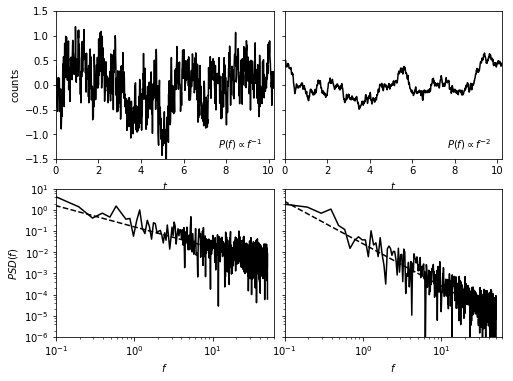

In [13]:
# Ivezic, Figure 10.29
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import generate_power_law
from astroML.fourier import PSD_continuous

N = 1024
dt = 0.01
factor = 100

t = dt * np.arange(N)
random_state = np.random.RandomState(1)

fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(wspace=0.05)

for i, beta in enumerate([1.0, 2.0]):
    # Generate the light curve and compute the PSD
    x = factor * generate_power_law(N, dt, beta, random_state=random_state)
    f, PSD = PSD_continuous(t, x)

    # First axes: plot the time series
    ax1 = fig.add_subplot(221 + i)
    ax1.plot(t, x, '-k')

    ax1.text(0.95, 0.05, r"$P(f) \propto f^{-%i}$" % beta,
             ha='right', va='bottom', transform=ax1.transAxes)

    ax1.set_xlim(0, 10.24)
    ax1.set_ylim(-1.5, 1.5)

    ax1.set_xlabel(r'$t$')

    # Second axes: plot the PSD
    ax2 = fig.add_subplot(223 + i, xscale='log', yscale='log')
    ax2.plot(f, PSD, '-k')
    ax2.plot(f[1:], (factor * dt) ** 2 * (2 * np.pi * f[1:]) ** -beta, '--k')

    ax2.set_xlim(1E-1, 60)
    ax2.set_ylim(1E-6, 1E1)

    ax2.set_xlabel(r'$f$')

    if i == 1:
        ax1.yaxis.set_major_formatter(plt.NullFormatter())
        ax2.yaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax1.set_ylabel(r'${\rm counts}$')
        ax2.set_ylabel(r'$PSD(f)$')

plt.show()

## Different stochastic processes

* A stochastic process with $1/f^2$ spectrum is known as random walk (if discrete) or Brownian motion (or, more accurately, Wiener process) if contiguous. These physically occur when the value being observed is subjected to a series of independent changes of similar size. It's also sometimes called as "red noise"
* A stochastic process with $1/f$ spectrum are sometimes called "long-term memory processes" (also sometimes know as "pink noise"). They have equal energy at all octaves (or over any other logarithmic frequency interval). This type of process has infinite variance and an undefined mean (remember the Lorentzian? this is similar.). Quasar variability exhibits $1/f$ properties.
* A process with a constant PSD is frequently referred to as "white nose" -- it has equal intensity at all frequencies. This is a process with no memory -- each measurement is independent of all others. 

### ACF for Unevenly Sampled Data

It's relatively strightforward to show that for evenly sampled discrete data, the autocorrelation function is equal to:

$$ ACF(j) = \frac{\sum_{i=1}^{N-j} \left[(y_i - \bar{y})(y_{i+j} - \bar{y})\right]}{\sum_{i=1}^{N} \left(y_i - \bar{y}\right)^2} $$

Life is generally not that kind; the data we collect are typically unevenly sampled, requiring more sophisticated estimators.

### AstroML tools for Generation and Analysis of Stochastic Data

astroML also has tools for computing the ACF of unevenly sampled data using two different (Scargle) and (Edelson & Krolik) methods: [http://www.astroml.org/modules/classes.html#module-astroML.time_series](http://www.astroml.org/modules/classes.html#module-astroML.time_series). This is described in more detail in $\S$ 10.5.2 in the textbook.

One of the tools is for generating a **damped random walk (DRW)**.  Above we learned that a random walk had a $1/f^2$ PSD.  A *damped* random walk is a process "remembers" its history only for a characteristic time, $\tau$. The ACF vanishes for $\Delta t \gg \tau$.

In [25]:
# Syntax for EK and Scargle ACF computation
import numpy as np
from astroML.time_series import generate_damped_RW
from astroML.time_series import ACF_scargle, ACF_EK

t = np.arange(0,1000)
y = generate_damped_RW(t, tau=300)
dy = 0.1
y = np.random.normal(y,dy)

ACF_scargle, bins_scargle = ACF_scargle(t,y,dy)
ACF_EK, ACF_err_EK, bins_EK = ACF_EK(t,y,dy)

Figure 10.30 below gives an example of an ACF for a DRW, which mimics the variability that we might see from a quasar.  (Note that the Scargle method doesn't seem to be working.)

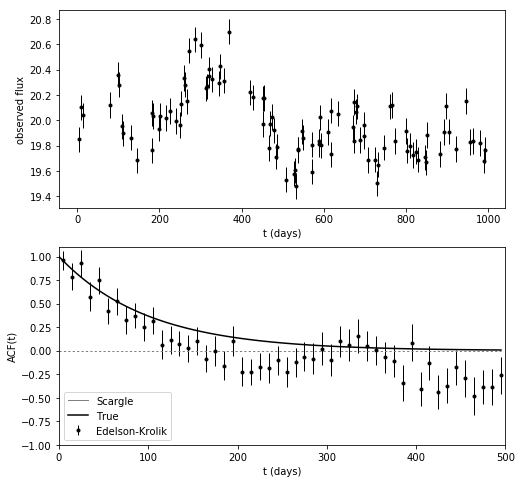

In [30]:
# Ivezic, Figure 10.30
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.time_series import lomb_scargle, generate_damped_RW
from astroML.time_series import ACF_scargle, ACF_EK

#------------------------------------------------------------
# Generate time-series data:
#  we'll do 1000 days worth of magnitudes

t = np.arange(0, 1E3)
z = 2.0
tau = 300
tau_obs = tau / (1. + z)

np.random.seed(6)
y = generate_damped_RW(t, tau=tau, z=z, xmean=20)

# randomly sample 100 of these
ind = np.arange(len(t))
np.random.shuffle(ind)
ind = ind[:100]
ind.sort()
t = t[ind]
y = y[ind]

# add errors
dy = 0.1
y_obs = np.random.normal(y, dy)

#------------------------------------------------------------
# compute ACF via scargle method
C_S, t_S = ACF_scargle(t, y_obs, dy, n_omega=2 ** 12, omega_max=np.pi / 5.0)

ind = (t_S >= 0) & (t_S <= 500)
t_S = t_S[ind]
C_S = C_S[ind]

#------------------------------------------------------------
# compute ACF via E-K method
C_EK, C_EK_err, bins = ACF_EK(t, y_obs, dy, bins=np.linspace(0, 500, 51))
t_EK = 0.5 * (bins[1:] + bins[:-1])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8, 8))

# plot the input data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1)
ax.set_xlabel('t (days)')
ax.set_ylabel('observed flux')

# plot the ACF
ax = fig.add_subplot(212)
ax.plot(t_S, C_S, '-', c='gray', lw=1, label='Scargle')
ax.errorbar(t_EK, C_EK, C_EK_err, fmt='.k', lw=1, label='Edelson-Krolik')
ax.plot(t_S, np.exp(-abs(t_S) / tau_obs), '-k', label='True')
ax.legend(loc=3)

ax.plot(t_S, 0 * t_S, ':', lw=1, c='gray')

ax.set_xlim(0, 500)
ax.set_ylim(-1.0, 1.1)

ax.set_xlabel('t (days)')
ax.set_ylabel('ACF(t)')

plt.show()

## Understanding the Observed Behaviors: Autoregressive Models

For processes like these that are not periodic, but that "retain memory" of previous states, we can use [autogressive models](https://en.wikipedia.org/wiki/Autoregressive_model).

A random walk is an example of such a process; every new value is given by the preceeding value plus some noise:

$$y_i = y_{i-1} + \epsilon_i.$$

If the coefficient of $y_{i-1}$ is $>1$ then it is known as a *geometric random walk*, which is typical of the stock market.  (So, when you interview for a quant position on Wall Street, you tell them that you are an expert in using autoregressive geometric random walks to model stochastic processes.)

In the random walk case above, each new value depends only on the immediately preceeding value.  But we can generalize this to include any number (we'll denote it $k$) of previous values:

$$y_i = \sum_{j=1}^k a_j y_{i-j} + \epsilon_i$$

We refer to this as an [**autoregressive (AR)**](https://en.wikipedia.org/wiki/Autoregressive_model) process of order $k$: $AR(k)$.  For a random walk, we have $k=1$, and $a_1=1$.

If the data are drawn from a "stationary" process (one where it doesn't matter what region of the light curve you sample [so long as it is representative]), the $a_j$ satisfy certain conditions.

One thing that we might do then is ask whether a system is more consistent with $a_1=0$ or $a_1=1$ (noise vs. a random walk).

Below are some example light curves for specific $AR(k)$ processes.  In the first example, $AR(0)$, the light curve is simply responding to noise fluctuations.  In the second example, $AR(1)$, the noise fluctuation responses are persisting for slightly longer as the next time step depends positively on the time before.  For the 3rd example, nearly the full effect of the noise spike from the previous time step is applied again, giving particularly long and high chains of peaks and valleys.  In the 4th example, $AR(2)$, we have long, but low chains of peaks and valleys as a spike persists for an extra time step.  Finally, in the 5th example, the response of a spike in the second time step has the opposite sign as for the first time step, and both have large coefficients, so the peaks and valleys are both quite high and quite narrowly separated.

![AR Examples](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/ArTimeSeries.svg/1000px-ArTimeSeries.svg.png)

## Moving Average models

A [**moving average (MA)**](https://en.wikipedia.org/wiki/Moving-average_model) process is similar in some ways to an AR process, but is different in other ways.  It is defined as

$$y_i = \epsilon_i + \sum_{j=1}^qb_j\epsilon_{i-j}.$$

So, for example, an MA(q=1) process would look like
$$y_i = \epsilon_{i} + b_1\epsilon_{i-1},$$

whereas an AR(k=2) process would look like

$$y_i = a_1y_{i-1} +  a_2y_{i-2} + \epsilon_i$$

Thus the $MA$ process is similar to an $AR$ process in that the next time step depends on the previous time step, but they are different in terms of how they respond to a *shock*.  In an $MA$ process a shock affects only the current value and $q$ values into the future.  In an $AR$ process a shock affects *all* future values.

Below is some code and a plot that illustrates this.

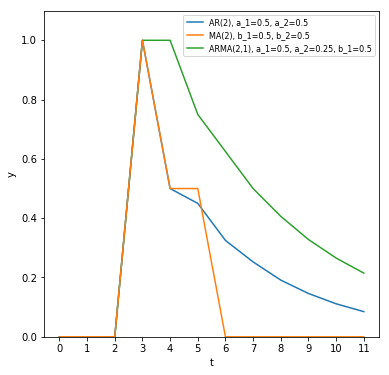

In [31]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

N=10

#epsilon = np.array([0,0,0,1,0,0,0,0,0,0,0,0])
epsilon = np.zeros(N+2)
epsilon[3] = 1
yAR=np.zeros(N+2)
yMA=np.zeros(N+2)
yARMA=np.zeros(N+2)

for i in np.arange(N)+2:
    # Complete using the coefficients given in the legend text below
    yAR[i] = 0.5*yAR[i-1] + 0.2*yAR[i-2] + epsilon[i]
    yMA[i] = epsilon[i] + 0.5*epsilon[i-1] + 0.5*epsilon[i-2]
    yARMA[i] = 0.5*yARMA[i-1] + 0.25*yARMA[i-2] + epsilon[i] + 0.5*epsilon[i-1]
    #print i, yAR[i], yMA[i]

fig = plt.figure(figsize=(6, 6))
t = np.arange(len(yAR))
plt.plot(t,yAR,label="AR(2), a_1=0.5, a_2=0.5")
plt.plot(t,yMA,label="MA(2), b_1=0.5, b_2=0.5")
plt.plot(t,yARMA,label="ARMA(2,1), a_1=0.5, a_2=0.25, b_1=0.5",zorder=0)
plt.xlabel("t")
plt.ylabel("y")
plt.legend(loc="upper right",prop={'size':8})
plt.ylim([0,1.1])
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))

plt.show()

Note that I also included an ARMA(2,1) model, which combines AR(2) and MA(1):
$$y_i = a_1y_{i-1} +  a_2y_{i-2} + \epsilon_i + b_1 \epsilon_{i-1}.$$

### CARMA Models

$AR$ and $ARMA$ models assume evenly sampled time-series data.  However, we can extend this to unevenly sampled data with $CAR$ or $CARMA$ processes, where the $C$ stands for *continuous*.  

A $CAR(1)$ process is described by a stochastic differential equation which includes a damping term that pushes $y(t)$ back towards the mean, so it is also a **damped random walk (DRW)**.  For evenly sampled data a CAR(1) process is the same as an AR(1) process with $a_1=\exp(-1/\tau)$.  That is, the next value is the previous value times the damping factor (plus noise).

The ACF for a DRW is given by
$$ ACF(t) = \exp(-t/\tau),$$
where $\tau$ is the characteristic timescale (i.e., the damping timescale).

The structure function can be written as
$$ SF(t) = SF_{\infty}[1-\exp(-t/\tau)]^{1/2}.$$

The PSD is then
$$ PSD(f) = \frac{\tau^2 SF_{\infty}^2}{1+(2\pi f \tau)^2},$$
which means that a DRW is a $1/f^2$ process at high frequency.  The *damped* part comes from the flat PSD at low frequency.

The ACF example above was an example of a DRW: the light curve is strongly correlated a short timescales, but uncorrelated at long timescales. This is observed in optical variability of quasar continuum light; in fact, it works so well that one can use this model to distinguish quasars from stars, based solely on the variability they exhibit.

## Regression and Classification

Regression and Classification for these stochastic models is just the same as before.   With our model and model parameters, we can predict future values via regression, or look for similarities/differences as a function of the model parameters via clustering (unsupervised) or classification (supervised).  Similarly, we can apply dimensionality reduction techniques to help visualize results from high-dimensional models.

## The Big Picture

Why are we doing all of this (ACF, PSD, SF, AR, MA, ARMA, CARMA...)?

To **identify** and **measure** the key properties of stochastic processes, those that make them similar rather than different. We're trying to "see beyond the noise". This is what statistics such as ACF, PSD and SF provide us with.

Once we've extracted such features (e.g., established that a phenomenon exhibits $\sim 1/f^2$ noise), we can **model** it (e.g., as random walk or damped random walk). That is the first step in understanding of the physics behind the process (e.g., if the process exhibits memory over a certain timescale $\tau$, we know it's likely occur in a causally connected region not larger than $c \tau$).

And finally, the **physical explanation** -- what causes the quasar to flicker, or a star to flare -- is then easier to deduce using the hints we obtain with the above.

## More Interesting Examples of Time Series Analysis

* [Is Seattle Really Seeing an Uptick in Cycling?](http://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/)
* [Understanding MA(1) processes](https://www.youtube.com/watch?v=lUhtcP2SUsg)
* [Understanding AR(1) processes](https://www.youtube.com/watch?v=AN0a58F6cxA)
* [Understanding ARMA(1,1)](https://www.youtube.com/watch?v=Pg0RnP1uLVc)